<a href="https://colab.research.google.com/github/hossamhamdy333/AI-Projects-Portfolio/blob/main/machine-learning-projects/medical-cost-prediction/medical_cost_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
!git clone https://github.com/hossamhamdy333/AI-Projects-Portfolio.git

fatal: destination path 'AI-Projects-Portfolio' already exists and is not an empty directory.


In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [127]:
# frame the problem
#1--> supervised/offline/regression
#2--> perfomrmance metrics -->RMSE,MSE,MAE

In [128]:
# get the data
data=pd.read_csv("/content/AI-Projects-Portfolio/machine-learning-projects/medical-cost-prediction/data/insurance.csv")

In [129]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [130]:
# function to save figures of this project
from pathlib import  Path
image_path = (
    Path("/content/AI-Projects-Portfolio")
    / "machine-learning-projects"
    / "medical-cost-prediction"
    / "images"
)
image_path.mkdir(parents=True,exist_ok=True)
def save_figure(fig_id,tight_layout=True,fig_extension="png",resolution=300):
    path=image_path /f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout(pad=2)
    plt.savefig(path,format=fig_extension,dpi=resolution)

In [131]:
#seprate the features from the target
x=data.drop("charges",axis=1)
y=data["charges"].copy()

In [132]:
# split the data
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.20,random_state=42)


In [133]:
#explore the data-->  a copy from the data
data_copied=data.copy()

In [134]:
data_copied

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [135]:
# EDA infornation about the data
def check_data(data,size=5):
      # fuction takes the data
      #***********
      # returns information about it
   print(f"informations about the data:\n{data.info()}")
   print(f"shape of the data:\n{data.shape}\n"
         f"size of the data:\n{data.size}\n"#nrows*ncols
         f"dimension of the data:\n{data.ndim}\n")
   print(f"type of the data:\n{data.dtypes}\n")
   print(f"head of the data:\n{data.head(size)}\n")
   print(f"tail of the data:\n{data.tail(size)}\n")
   print(f"random sample from the data:\n {data.sample(size)}\n")
   print(f"number of missing values in each feature:\n{data.isnull().sum()}\n")
   print(f"total number of misssing values:\n{data.isnull().sum().sum()}\n"
         f"persentage of missing values in each feature:\n{data.isnull().mean()*100}\n")
   print(f"numpur of duplicated rows:\n{data.duplicated().sum()}\n")
   print(f"number of unique values in each feature:\n{data.nunique()}\n")
   print(f"data describtion:\n{data.describe().T}\n")




In [136]:
check_data(data_copied)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
informations about the data:
None
shape of the data:
(1338, 7)
size of the data:
9366
dimension of the data:
2

type of the data:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

head of the data:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeas

In [137]:
# getting the kind of each feature
def info_features(data,catagorical_th=10,cardinal_th=20,print_result=True):
    #function takes the data,cat_th=10(set it as you want),car_th=20,print_result=True (set it as you want)
    #********
    #returns cat cols,num cols, cat but car cols(cardinal feature has a large number unique values)
    cat_cols=[col for col in data.columns if str(data[col].dtypes) in ['category','object','bool']]
    num_but_cat=[col for col in data.columns if data[col].nunique()<10 and data[col].dtypes in ["int","float"]]
    cat_but_car=[col for col in data.columns if data[col].nunique()>20 and str(data[col].dtypes) in ["catagory","object"]]
    cat_cols=[col for col in cat_cols if col not in cat_but_car]
    cat_cols=cat_cols+num_but_cat
    num_cols=[col for col in data.columns if data[col].dtypes in ['int',"float"] ]


    num_cols=[col for col in num_cols if col not in cat_cols]

    if print_result:
        print(f'number of instaces {data.shape[0]}')
        print(f'faetures:  {data.shape[1]}')
        print(f'cat_cols:  {len(cat_cols)}')

        print(f'num_cols:  {len(num_cols)}')
        print(f'cat_but_car:  {len(cat_but_car)}')
        print(f'num_but_cat:  {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [138]:
cat_cols,num_cols,cat_but_var=info_features(data_copied)

number of instaces 1338
faetures:  7
cat_cols:  4
num_cols:  3
cat_but_car:  0
num_but_cat:  1


In [139]:
cat_cols,num_cols

(['sex', 'smoker', 'region', 'children'], ['age', 'bmi', 'charges'])

In [140]:
# information about the catigorical values
for col in cat_cols:
  print(f"{data_copied[col].value_counts()}")

sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


In [141]:
for col in num_cols:
  print(f"{col} \nmin-->{data_copied[col].min()}")
  print(f"max-->{data_copied[col].max()}")

age 
min-->18
max-->64
bmi 
min-->15.96
max-->53.13
charges 
min-->1121.8739
max-->63770.42801


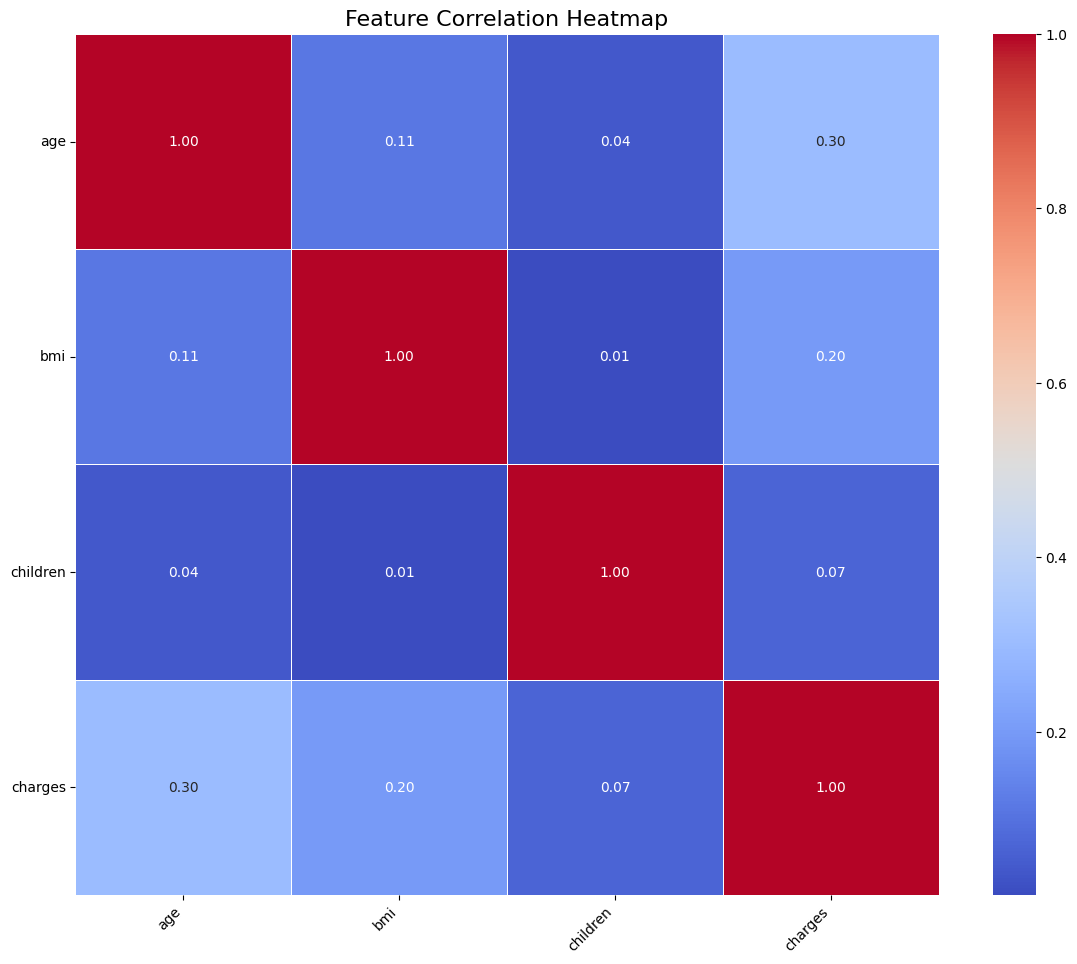

In [142]:
# looking for correlations
corr=data_copied.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    cmap="coolwarm",       # better diverging colormap
    annot=True,            # show values
    fmt=".2f",             # 2 decimal places
    linewidths=0.5,        # lines between cells
    cbar=True              # show color bar
)

# Rotate labels for clarity
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

# Add title
plt.title("Feature Correlation Heatmap", fontsize=16)

# Save the figure using your function
save_figure("correlations_between_features", resolution=300)
plt.show()


In [143]:
# feature engineering -->looking for some useful transformation
data_copied["high_risk"]=((data_copied['bmi']>30) &
(data_copied["smoker"]=="yes")&
(data_copied["age"]>50)).astype(int)

In [144]:
(data_copied['high_risk']==1).sum()

np.int64(38)

In [145]:
corr=data_copied.corr(numeric_only=True)
corr

,age,bmi,children,charges,high_risk
age,1.000000,0.109272,0.042469,0.299008,0.225569
bmi,0.109272,1.000000,0.012759,0.198341,0.145574
children,0.042469,0.012759,1.000000,0.067998,0.005201
charges,0.299008,0.198341,0.067998,1.000000,0.481587
high_risk,0.225569,0.145574,0.005201,0.481587,1.000000


In [146]:
# discrete the continoues features
data_copied["age_cat"]=pd.cut(data_copied["age"],bins=[0,16,32,55,90],
                       labels=["young","adult","middle_age","old"])

In [147]:
data_copied["age_cat"]

,age_cat
0,adult
1,adult
2,adult
3,middle_age
4,adult
...,...
1333,middle_age
1334,adult
1335,adult
1336,adult


In [148]:
data_copied['bmi_cat'] = pd.cut(data_copied['bmi'],
                                  bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9,  np.inf],
                                  labels=["Underweight", "Healthy", "Overweight",
                                          "Obese_Class1", "Obese_Class2", "Obese_Class3"])

In [149]:
data_copied['bmi_cat']

,bmi_cat
0,Overweight
1,Obese_Class1
2,Obese_Class1
3,Healthy
4,Overweight
...,...
1333,Obese_Class1
1334,Obese_Class1
1335,Obese_Class2
1336,Overweight


In [150]:
corr=data_copied.corr(numeric_only=True)
corr

,age,bmi,children,charges,high_risk
age,1.000000,0.109272,0.042469,0.299008,0.225569
bmi,0.109272,1.000000,0.012759,0.198341,0.145574
children,0.042469,0.012759,1.000000,0.067998,0.005201
charges,0.299008,0.198341,0.067998,1.000000,0.481587
high_risk,0.225569,0.145574,0.005201,0.481587,1.000000


In [162]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error

In [152]:

# Custom feature engineering transformer
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        # high risk feature
        X["high_risk"] = (
            (X["bmi"] > 30) &
            (X["smoker"] == "yes") &
            (X["age"] > 50)
        ).astype(int)

        # discretization
        X["age_cat"] = pd.cut(
            X["age"],
            bins=[0, 16, 32, 55, 90],
            labels=["young", "adult", "middle_age", "old"]
        )

        X["bmi_cat"] = pd.cut(
            X["bmi"],
            bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, np.inf],
            labels=[
                "Underweight", "Healthy", "Overweight",
                "Obese_Class1", "Obese_Class2", "Obese_Class3"
            ]
        )

        # drop continuous
        X = X.drop(["age", "bmi"], axis=1)

        return X


In [153]:
categorical_features = [
    "sex", "smoker", "region", "age_cat", "bmi_cat"
]

numerical_features = [
    "children", "high_risk"
]


In [154]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", StandardScaler(), numerical_features)
    ]
)


In [165]:
from sklearn.linear_model import LinearRegression

model_pipeline_linear = Pipeline(steps=[
    ("feature_engineering", FeatureEngineer()),
    ("preprocessing", preprocessor),
    ("model", LinearRegression())
])

In [166]:
model_pipeline_linear.fit(x_train, y_train)

y_pred = model_pipeline_linear.predict(x_val)


rmse = root_mean_squared_error(y_val, y_pred)
rmse

5797.456518983552

In [169]:
from sklearn.linear_model import SGDRegressor
model_pipeline_sgd_regressor = Pipeline(steps=[
    ("feature_engineering", FeatureEngineer()),
    ("preprocessing", preprocessor),
    ("model", SGDRegressor())
])

In [172]:
model_pipeline_sgd_regressor.fit(x_train,y_train)
y_pred = model_pipeline_sgd_regressor.predict(x_val)
rmse = root_mean_squared_error(y_val, y_pred)
rmse

5746.406774101774

In [176]:
#pollynomial regression
from sklearn.preprocessing import PolynomialFeatures
numerical_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=3, include_bias=False, interaction_only=False))
])
preprocessor = ColumnTransformer(transformers=[
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ("num", numerical_pipeline, numerical_features)
])
model_pipeline_polynomial = Pipeline(steps=[
    ("feature_engineering", FeatureEngineer()),
    ("preprocessing", preprocessor),
    ("model", LinearRegression())
])


In [177]:
model_pipeline_polynomial.fit(x_train,y_train)
y_pred = model_pipeline_polynomial.predict(x_val)
rmse = root_mean_squared_error(y_val, y_pred)
rmse

5796.71750035001